-  Name: Vishal Maurya
-  Roll No: MDS202354

# Importing Libraries

In [1]:
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from contractions import fix
from wordcloud import WordCloud
from collections import Counter

# Loading Dataset

In [2]:
# Data file path
filepath= r"/content/SMSSpamCollection"

In [3]:
df = pd.read_csv(filepath, sep="\t", header=None, names=["label", "message"])
df.head(6)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [4]:
df.shape

(5572, 2)

In [5]:
# Removing duplicate data
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


- There are no missing values.

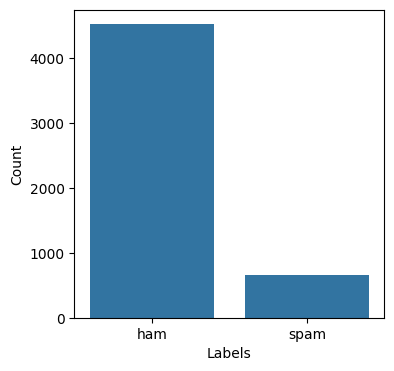

In [7]:
# Plot the value counts
plt.figure(figsize=(4, 4))
sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts().values)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

- Classes are imbalanced.

# Data Preprocessing

Steps:
- Convert labels to binary.
- Lowercase the text.
- Expand contractions (e.g., "Don't" → "Do not").
- Remove punctuation and special characters.
- Filter out words with length 1.

In [8]:
# Convert labels to binary (ham -> 0, spam -> 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [9]:
def preprocess_text(text):

    # Lowercase
    text = text.lower()

    # Expand Contractions
    text = fix(text)

    # Remove punctuation and special characters
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization and filtering short words
    words = text.split()
    words = [word for word in words if len(word) > 1]

    return " ".join(words)

df["preprocessed_message"] = df["message"].apply(preprocess_text)

# Display preprocessed messages
df.head()

,label,message,preprocessed_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah do not think he goes to usf he lives aroun...


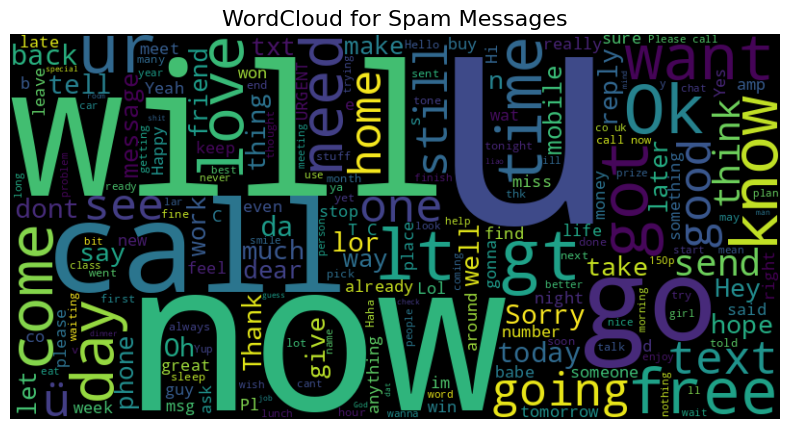

In [10]:
# Visualising word frequency
text = ' '.join(df['message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Messages', fontsize=16)
plt.show()

# Splitting Dataset

Splitting the dataset into 60%, 20%, 20% for train, validation and test respectively.

In [11]:
train, val_test = train_test_split(df[["preprocessed_message", "label"]], test_size = 0.40, random_state=42)
val, test = train_test_split(val_test, test_size = 0.50, random_state=42)

In [12]:
# Saving the splitted data
train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)